In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('finalesheet.xlsx')

In [3]:
df

,DATE,CSUSHPISA,IR,MSNH,MOHP,MR30,RI,PPICM,UNER,BP,CPI
0,2000-01-01,100.552,2.7,4.3,290.0,NaN,180.900,144.100,4.0,1727.0,169.300
1,2000-02-01,101.339,3.2,4.3,335.0,NaN,181.300,144.700,4.1,1692.0,170.000
2,2000-03-01,102.127,3.8,4.3,416.0,NaN,181.900,145.400,4.0,1651.0,171.000
3,2000-04-01,102.922,3.1,4.4,407.0,8.1525,182.300,145.600,3.8,1597.0,170.900
4,2000-05-01,103.677,3.2,4.4,462.0,8.5150,182.800,144.900,4.0,1543.0,171.200
...,...,...,...,...,...,...,...,...,...,...,...
264,2022-01-01,284.424,7.5,5.7,NaN,3.4450,357.476,345.346,4.0,1841.0,281.933
265,2022-02-01,290.209,7.9,6.0,NaN,3.7625,359.501,343.196,3.8,1857.0,284.182
266,2022-03-01,296.276,8.5,6.9,NaN,4.1720,361.050,344.751,3.6,1879.0,287.708
267,NaT,NaN,8.3,9.0,NaN,4.9825,363.067,344.106,3.6,1823.0,288.663


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       267 non-null    datetime64[ns]
 1   CSUSHPISA  267 non-null    float64       
 2   IR         268 non-null    float64       
 3   MSNH       268 non-null    float64       
 4   MOHP       258 non-null    float64       
 5   MR30       266 non-null    float64       
 6   RI         268 non-null    float64       
 7   PPICM      268 non-null    float64       
 8   UNER       268 non-null    float64       
 9   BP         268 non-null    float64       
 10  CPI        268 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 23.2 KB


In [5]:
df.describe()

,CSUSHPISA,IR,MSNH,MOHP,MR30,RI,PPICM,UNER,BP,CPI
count,267.000000,268.000000,268.000000,258.000000,266.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,167.528760,2.332836,5.775746,338.244186,4.946291,260.632858,199.756537,5.925000,1348.250000,220.841769
std,38.521087,1.542180,1.881282,107.409896,1.326690,49.693909,41.997744,1.948535,468.013109,29.151833
min,100.552000,-2.100000,3.300000,138.000000,2.684000,180.900000,141.700000,3.500000,513.000000,169.300000
25%,141.657000,1.500000,4.300000,255.250000,3.890000,218.000000,170.000000,4.500000,1009.500000,195.800000
50%,164.049000,2.100000,5.300000,324.500000,4.637500,251.710500,201.850000,5.400000,1327.500000,222.472000
75%,184.440000,3.200000,6.600000,416.000000,6.067250,299.330000,215.800000,6.825000,1695.750000,241.317250
max,296.276000,8.500000,12.200000,618.000000,8.515000,363.067000,345.346000,14.700000,2263.000000,288.663000


In [6]:
data = df.dropna().reset_index()

In [7]:
data = data.drop(columns=['index'])

In [8]:
data

,DATE,CSUSHPISA,IR,MSNH,MOHP,MR30,RI,PPICM,UNER,BP,CPI
0,2000-04-01,102.922,3.1,4.4,407.0,8.1525,182.300,145.6,3.8,1597.0,170.900
1,2000-05-01,103.677,3.2,4.4,462.0,8.5150,182.800,144.9,4.0,1543.0,171.200
2,2000-06-01,104.424,3.7,4.8,491.0,8.2880,183.400,145.0,4.0,1572.0,172.200
3,2000-07-01,105.053,3.7,4.1,431.0,8.1475,184.100,144.4,4.0,1542.0,172.700
4,2000-08-01,105.767,3.4,4.4,471.0,8.0275,184.800,143.7,4.1,1552.0,172.700
...,...,...,...,...,...,...,...,...,...,...,...
250,2021-02-01,241.832,1.7,4.8,309.0,2.8100,345.121,264.6,6.2,1743.0,263.346
251,2021-03-01,245.794,2.6,4.2,415.0,3.0825,345.684,276.7,6.0,1773.0,265.028
252,2021-04-01,250.122,4.2,4.7,437.0,3.0600,346.379,291.8,6.0,1765.0,266.727
253,2021-05-01,254.596,5.0,5.4,433.0,2.9625,347.253,305.9,5.8,1691.0,268.599


## Exploratory Data Analysis

<AxesSubplot:>

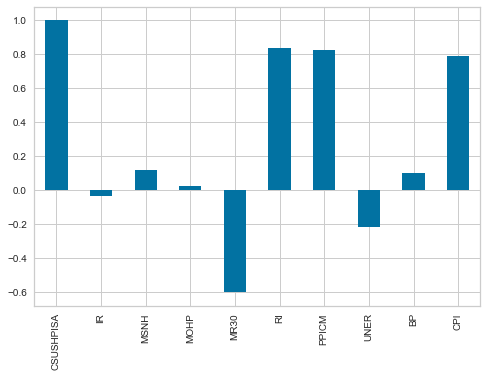

In [9]:
corr = data.corr()
corr['CSUSHPISA'].plot(kind='bar')

<AxesSubplot:>

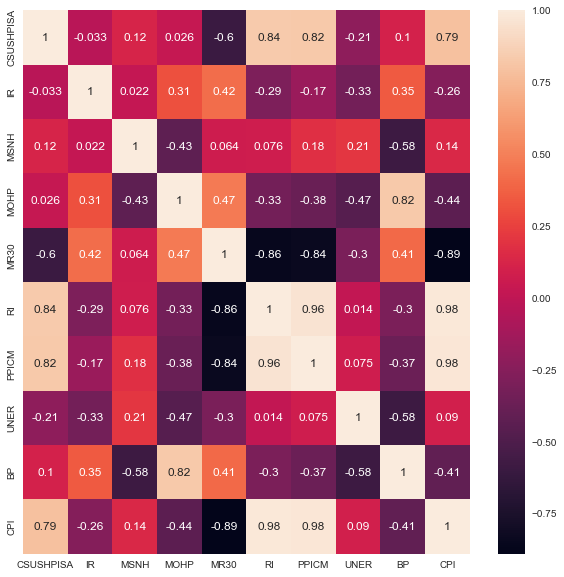

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

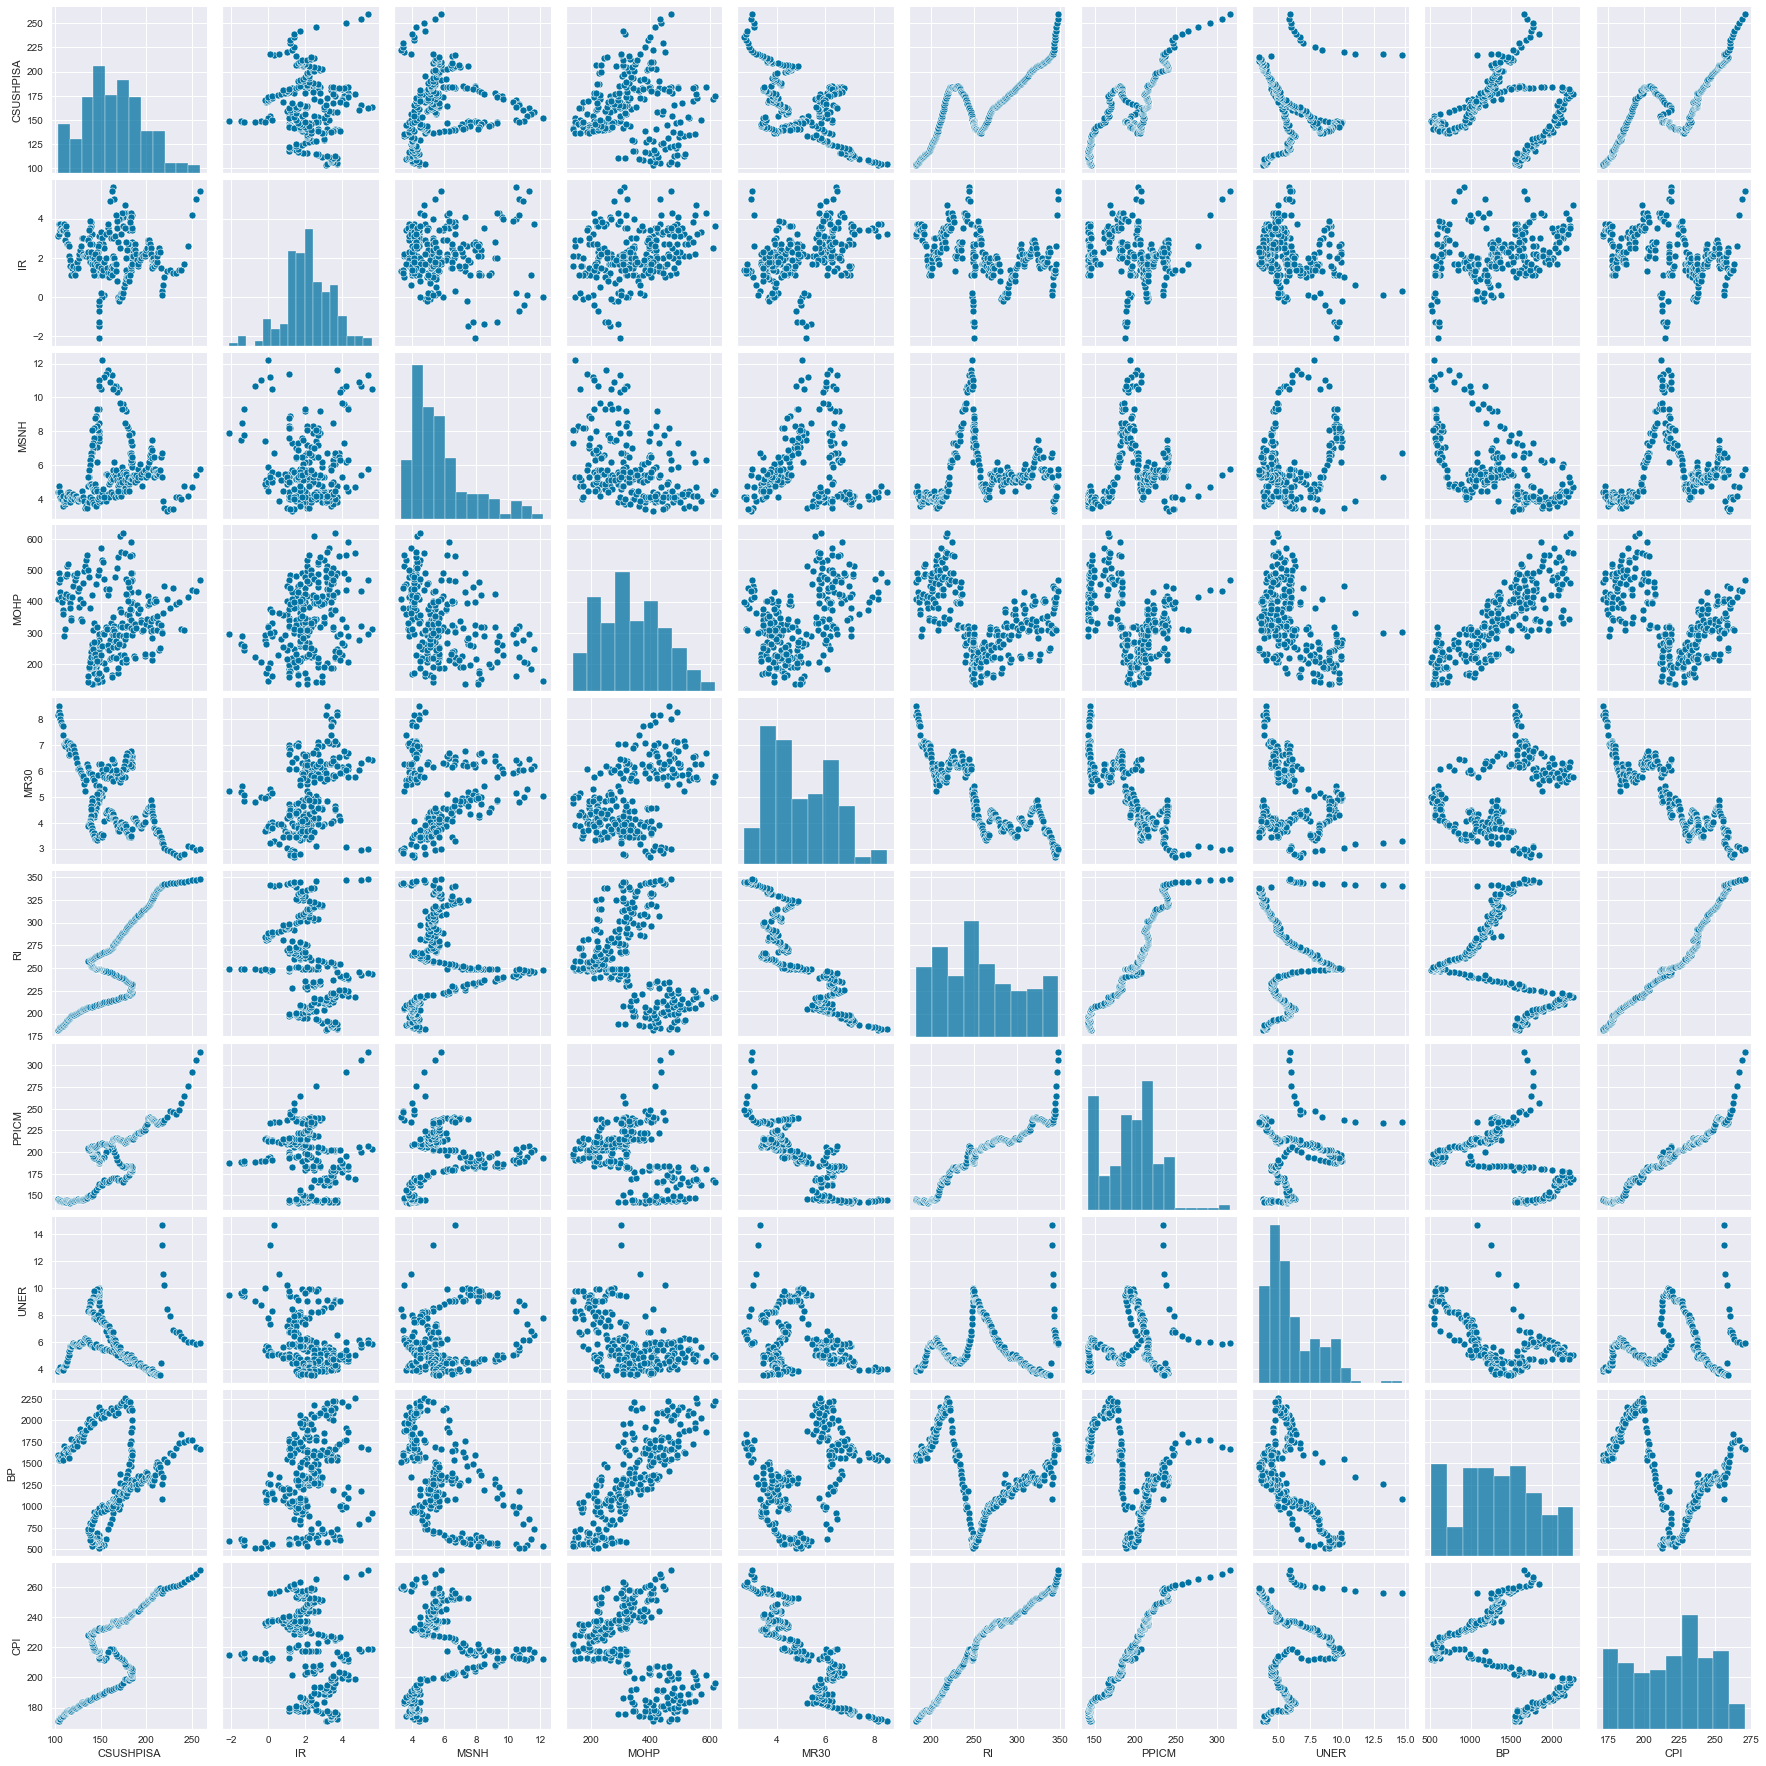

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [12]:
x = data.iloc[:,2:]
y = data.iloc[:,1]

In [13]:
print(x)

      IR  MSNH   MOHP    MR30       RI  PPICM  UNER      BP      CPI
0    3.1   4.4  407.0  8.1525  182.300  145.6   3.8  1597.0  170.900
1    3.2   4.4  462.0  8.5150  182.800  144.9   4.0  1543.0  171.200
2    3.7   4.8  491.0  8.2880  183.400  145.0   4.0  1572.0  172.200
3    3.7   4.1  431.0  8.1475  184.100  144.4   4.0  1542.0  172.700
4    3.4   4.4  471.0  8.0275  184.800  143.7   4.1  1552.0  172.700
..   ...   ...    ...     ...      ...    ...   ...     ...      ...
250  1.7   4.8  309.0  2.8100  345.121  264.6   6.2  1743.0  263.346
251  2.6   4.2  415.0  3.0825  345.684  276.7   6.0  1773.0  265.028
252  4.2   4.7  437.0  3.0600  346.379  291.8   6.0  1765.0  266.727
253  5.0   5.4  433.0  2.9625  347.253  305.9   5.8  1691.0  268.599
254  5.4   5.8  468.0  2.9750  348.095  315.7   5.9  1661.0  270.955

[255 rows x 9 columns]


In [14]:
print(y)

0      102.922
1      103.677
2      104.424
3      105.053
4      105.767
        ...   
250    241.832
251    245.794
252    250.122
253    254.596
254    259.286
Name: CSUSHPISA, Length: 255, dtype: float64


In [15]:
x.columns

Index(['IR', 'MSNH', 'MOHP', 'MR30', 'RI', 'PPICM', 'UNER', 'BP', 'CPI'], dtype='object')

<AxesSubplot:xlabel='DATE', ylabel='CSUSHPISA'>

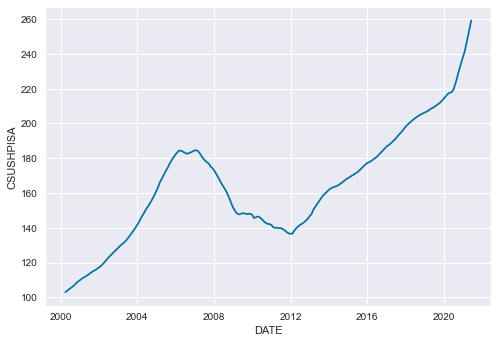

In [16]:
sns.lineplot(x='DATE', y='CSUSHPISA', data=data)

<AxesSubplot:xlabel='DATE', ylabel='IR'>

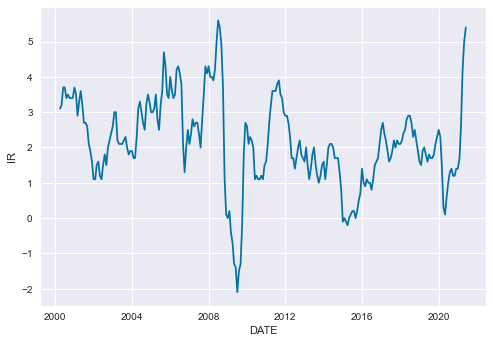

In [17]:
sns.lineplot(x='DATE', y='IR', data=data)

<AxesSubplot:xlabel='DATE', ylabel='MSNH'>

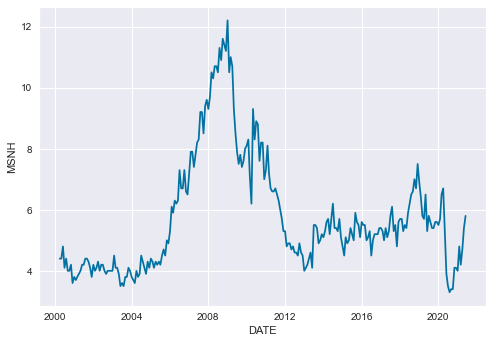

In [18]:
sns.lineplot(x='DATE', y='MSNH', data=data)

<AxesSubplot:xlabel='DATE', ylabel='MOHP'>

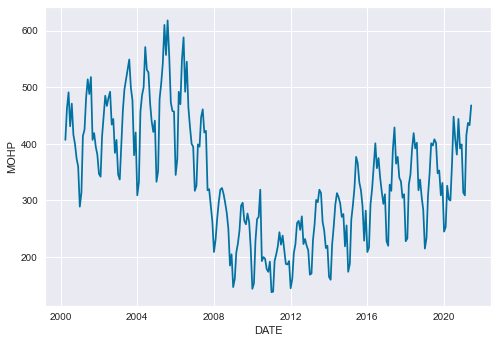

In [19]:
sns.lineplot(x='DATE', y='MOHP', data=data)

<AxesSubplot:xlabel='DATE', ylabel='MR30'>

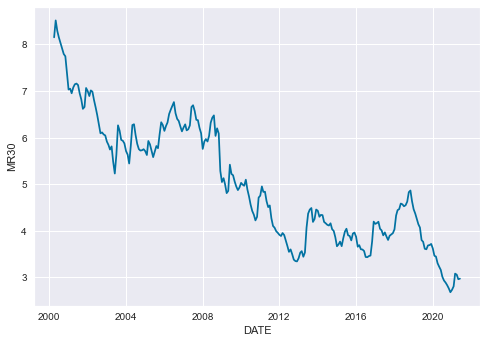

In [20]:
sns.lineplot(x='DATE', y='MR30', data=data)

<AxesSubplot:xlabel='DATE', ylabel='RI'>

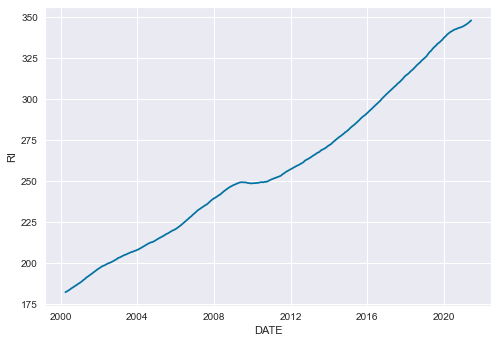

In [21]:
sns.lineplot(x='DATE', y='RI', data=data)

<AxesSubplot:xlabel='DATE', ylabel='PPICM'>

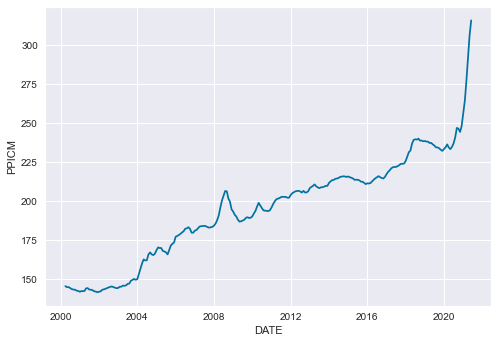

In [22]:
sns.lineplot(x='DATE', y='PPICM', data=data)

<AxesSubplot:xlabel='DATE', ylabel='BP'>

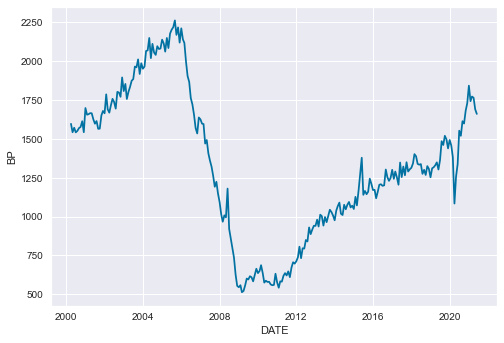

In [23]:
sns.lineplot(x='DATE', y='BP', data=data)

<AxesSubplot:xlabel='DATE', ylabel='CPI'>

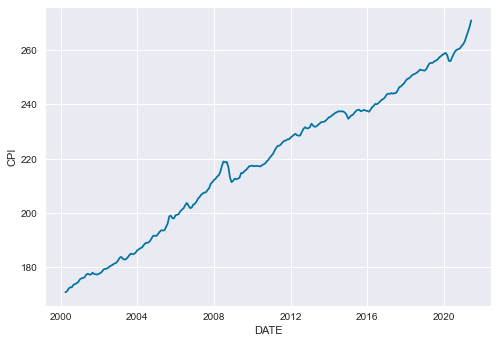

In [24]:
sns.lineplot(x='DATE', y='CPI', data=data)

In [25]:
# Splitting Data into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.columns

Index(['IR', 'MSNH', 'MOHP', 'MR30', 'RI', 'PPICM', 'UNER', 'BP', 'CPI'], dtype='object')

In [27]:
#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Linear Regression

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)
y_pred

array([149.68003459, 176.21085596, 169.14784959, 170.13211948,
       147.92848062, 184.11418521, 145.10229457, 216.35805108,
       170.79147395, 139.91781492, 147.52782423, 218.09361069,
       147.0534137 , 173.75457946, 145.66308717, 177.79363472,
       190.70881257, 176.94146031, 155.71014566, 174.10302726,
       175.40689177, 139.82849077, 217.53190603, 137.57971811,
       148.38526651, 259.78729267,  99.37411948, 158.58946885,
       210.79035011, 131.70004863, 177.64999636, 141.11199744,
       144.66852673, 181.47925628, 172.48170194, 141.10694224,
       180.26287649, 104.69876572, 125.30551604, 172.62093936,
       137.15518778, 111.81208768, 176.9991179 , 167.87574854,
       160.78334085, 138.12335494, 212.77057294, 144.29207266,
       175.31673228, 190.69890249, 185.58494117])

In [30]:
regressor.coef_

array([-2.08301703, 13.76921824,  1.65023673,  3.07215685, -1.36485262,
        7.18098602,  3.15391098, 26.43063749, 32.67240683])

In [31]:
print(regressor.score(X_test,y_test))
print('MSE = {}'.format(MSE(y_test, y_pred)))
print('RMSE = {} '.format(MSE(y_test, y_pred)**(1/2)))
print('MAE = {}'.format(MAE(y_test, y_pred)))
print('R Squared = {}'.format(r2_score(y_test, y_pred)))


0.9590700873937907
MSE = 34.49937992577493
RMSE = 5.873617277774824 
MAE = 4.225481669452845
R Squared = 0.9590700873937907


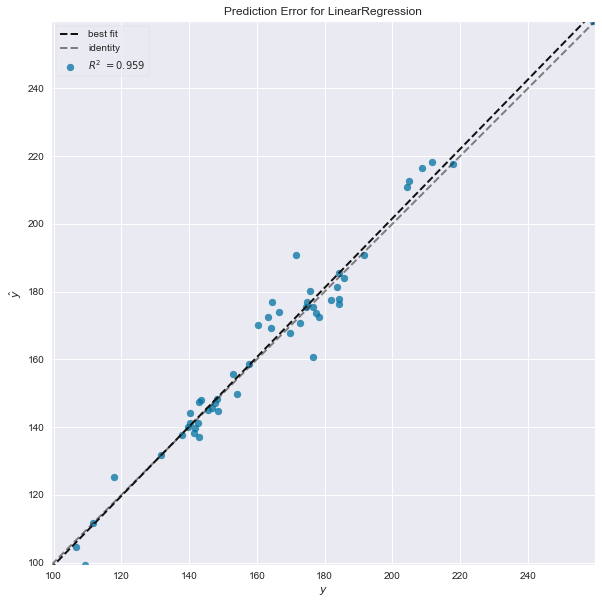

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:
plt.figure(figsize=(10,10))
visualizer = PredictionError(regressor)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

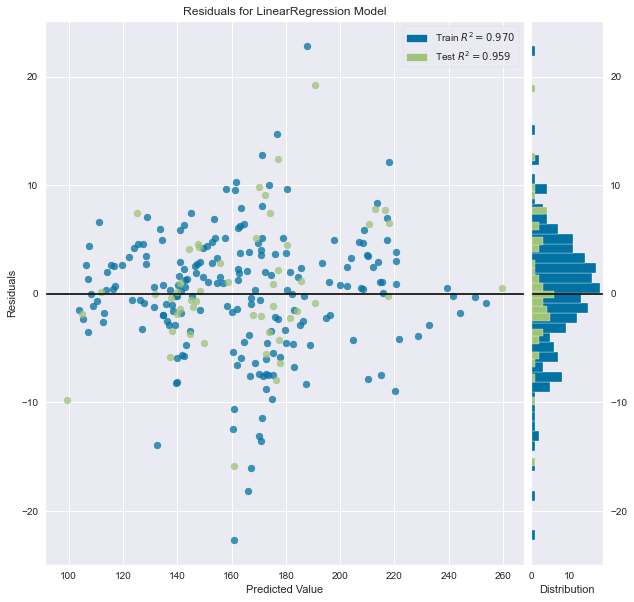

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
plt.figure(figsize=(10,10))
visualizer2 = ResidualsPlot(regressor)
visualizer2.fit(X_train, y_train)  
visualizer2.score(X_test, y_test)  
visualizer2.show()

In [34]:
regressor.fit(x,y).coef_

array([-1.51323358,  7.00651956,  0.0139093 ,  2.0263909 ,  0.03394959,
        0.22726321,  1.64662282,  0.05532322,  1.03427678])

In [35]:
coefficients = pd.DataFrame(x.columns)
coefficients['Linear'] = regressor.fit(x,y).coef_

### Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso(alpha=0.01)

In [38]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [39]:
y_pred2 = lasso.predict(X_test)

In [40]:
lasso.coef_

array([-1.93846219, 13.75945756,  1.62991644,  2.65527111, -0.        ,
        7.47884436,  3.03292256, 26.133422  , 30.57743259])

In [41]:
print(lasso.score(X_test,y_test))
print('MSE = {}'.format(MSE(y_test, y_pred2)))
print('RMSE = {} '.format(MSE(y_test, y_pred2)**(1/2)))
print('MAE = {}'.format(MAE(y_test, y_pred2)))
print('R Squared = {}'.format(r2_score(y_test, y_pred2)))

0.9598605838820083
MSE = 33.83307899961867
RMSE = 5.816620926243919 
MAE = 4.1848840974671635
R Squared = 0.9598605838820083


In [42]:
lasso.fit(x, y).coef_

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.723e+01, tolerance: 2.685e+01
  model = cd_fast.enet_coordinate_descent(


array([-1.4884506 ,  7.0110656 ,  0.01400772,  1.93527444,  0.03676483,
        0.22806334,  1.62860346,  0.05522147,  1.02436772])

In [43]:
#Hyperparameter Tuning

parameters = [{'alpha':np.arange(0.1,5,0.1)}]
grid = GridSearchCV(estimator = lasso,param_grid = parameters,cv = 10,verbose = 10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV 1/10; 1/49] START alpha=0.1.................................................
[CV 1/10; 1/49] END ..................alpha=0.1;, score=0.982 total time=   0.0s
[CV 2/10; 1/49] START alpha=0.1.................................................
[CV 2/10; 1/49] END ..................alpha=0.1;, score=0.977 total time=   0.0s
[CV 3/10; 1/49] START alpha=0.1.................................................
[CV 3/10; 1/49] END ..................alpha=0.1;, score=0.955 total time=   0.0s
[CV 4/10; 1/49] START alpha=0.1.................................................
[CV 4/10; 1/49] END ..................alpha=0.1;, score=0.992 total time=   0.0s
[CV 5/10; 1/49] START alpha=0.1.................................................
[CV 5/10; 1/49] END ..................alpha=0.1;, score=0.935 total time=   0.0s
[CV 6/10; 1/49] START alpha=0.1.................................................
[CV 6/10; 1/49] END ..................alpha=0.

[CV 2/10; 8/49] END ..................alpha=0.8;, score=0.946 total time=   0.0s
[CV 3/10; 8/49] START alpha=0.8.................................................
[CV 3/10; 8/49] END ..................alpha=0.8;, score=0.932 total time=   0.0s
[CV 4/10; 8/49] START alpha=0.8.................................................
[CV 4/10; 8/49] END ..................alpha=0.8;, score=0.989 total time=   0.0s
[CV 5/10; 8/49] START alpha=0.8.................................................
[CV 5/10; 8/49] END ..................alpha=0.8;, score=0.924 total time=   0.0s
[CV 6/10; 8/49] START alpha=0.8.................................................
[CV 6/10; 8/49] END ..................alpha=0.8;, score=0.936 total time=   0.0s
[CV 7/10; 8/49] START alpha=0.8.................................................
[CV 7/10; 8/49] END ..................alpha=0.8;, score=0.963 total time=   0.0s
[CV 8/10; 8/49] START alpha=0.8.................................................
[CV 8/10; 8/49] END ........

[CV 6/10; 14/49] END ..alpha=1.4000000000000001;, score=0.929 total time=   0.0s
[CV 7/10; 14/49] START alpha=1.4000000000000001.................................
[CV 7/10; 14/49] END ..alpha=1.4000000000000001;, score=0.961 total time=   0.0s
[CV 8/10; 14/49] START alpha=1.4000000000000001.................................
[CV 8/10; 14/49] END ..alpha=1.4000000000000001;, score=0.971 total time=   0.0s
[CV 9/10; 14/49] START alpha=1.4000000000000001.................................
[CV 9/10; 14/49] END ..alpha=1.4000000000000001;, score=0.879 total time=   0.0s
[CV 10/10; 14/49] START alpha=1.4000000000000001................................
[CV 10/10; 14/49] END .alpha=1.4000000000000001;, score=0.931 total time=   0.0s
[CV 1/10; 15/49] START alpha=1.5000000000000002.................................
[CV 1/10; 15/49] END ..alpha=1.5000000000000002;, score=0.949 total time=   0.0s
[CV 2/10; 15/49] START alpha=1.5000000000000002.................................
[CV 2/10; 15/49] END ..alpha

[CV 9/10; 21/49] END .................alpha=2.1;, score=0.850 total time=   0.0s
[CV 10/10; 21/49] START alpha=2.1...............................................
[CV 10/10; 21/49] END ................alpha=2.1;, score=0.909 total time=   0.0s
[CV 1/10; 22/49] START alpha=2.2................................................
[CV 1/10; 22/49] END .................alpha=2.2;, score=0.929 total time=   0.0s
[CV 2/10; 22/49] START alpha=2.2................................................
[CV 2/10; 22/49] END .................alpha=2.2;, score=0.899 total time=   0.0s
[CV 3/10; 22/49] START alpha=2.2................................................
[CV 3/10; 22/49] END .................alpha=2.2;, score=0.880 total time=   0.0s
[CV 4/10; 22/49] START alpha=2.2................................................
[CV 4/10; 22/49] END .................alpha=2.2;, score=0.968 total time=   0.0s
[CV 5/10; 22/49] START alpha=2.2................................................
[CV 5/10; 22/49] END .......

[CV 9/10; 28/49] END ..alpha=2.8000000000000003;, score=0.812 total time=   0.0s
[CV 10/10; 28/49] START alpha=2.8000000000000003................................
[CV 10/10; 28/49] END .alpha=2.8000000000000003;, score=0.879 total time=   0.0s
[CV 1/10; 29/49] START alpha=2.9000000000000004.................................
[CV 1/10; 29/49] END ..alpha=2.9000000000000004;, score=0.904 total time=   0.0s
[CV 2/10; 29/49] START alpha=2.9000000000000004.................................
[CV 2/10; 29/49] END ..alpha=2.9000000000000004;, score=0.863 total time=   0.0s
[CV 3/10; 29/49] START alpha=2.9000000000000004.................................
[CV 3/10; 29/49] END ..alpha=2.9000000000000004;, score=0.842 total time=   0.0s
[CV 4/10; 29/49] START alpha=2.9000000000000004.................................
[CV 4/10; 29/49] END ..alpha=2.9000000000000004;, score=0.949 total time=   0.0s
[CV 5/10; 29/49] START alpha=2.9000000000000004.................................
[CV 5/10; 29/49] END ..alpha

[CV 10/10; 34/49] END .alpha=3.4000000000000004;, score=0.847 total time=   0.0s
[CV 1/10; 35/49] START alpha=3.5000000000000004.................................
[CV 1/10; 35/49] END ..alpha=3.5000000000000004;, score=0.877 total time=   0.0s
[CV 2/10; 35/49] START alpha=3.5000000000000004.................................
[CV 2/10; 35/49] END ..alpha=3.5000000000000004;, score=0.826 total time=   0.0s
[CV 3/10; 35/49] START alpha=3.5000000000000004.................................
[CV 3/10; 35/49] END ..alpha=3.5000000000000004;, score=0.803 total time=   0.0s
[CV 4/10; 35/49] START alpha=3.5000000000000004.................................
[CV 4/10; 35/49] END ..alpha=3.5000000000000004;, score=0.928 total time=   0.0s
[CV 5/10; 35/49] START alpha=3.5000000000000004.................................
[CV 5/10; 35/49] END ..alpha=3.5000000000000004;, score=0.825 total time=   0.0s
[CV 6/10; 35/49] START alpha=3.5000000000000004.................................
[CV 6/10; 35/49] END ..alpha

[CV 9/10; 40/49] END .................alpha=4.0;, score=0.728 total time=   0.0s
[CV 10/10; 40/49] START alpha=4.0...............................................
[CV 10/10; 40/49] END ................alpha=4.0;, score=0.810 total time=   0.0s
[CV 1/10; 41/49] START alpha=4.1................................................
[CV 1/10; 41/49] END .................alpha=4.1;, score=0.847 total time=   0.0s
[CV 2/10; 41/49] START alpha=4.1................................................
[CV 2/10; 41/49] END .................alpha=4.1;, score=0.784 total time=   0.0s
[CV 3/10; 41/49] START alpha=4.1................................................
[CV 3/10; 41/49] END .................alpha=4.1;, score=0.758 total time=   0.0s
[CV 4/10; 41/49] START alpha=4.1................................................
[CV 4/10; 41/49] END .................alpha=4.1;, score=0.904 total time=   0.0s
[CV 5/10; 41/49] START alpha=4.1................................................
[CV 5/10; 41/49] END .......

[CV 4/10; 46/49] END .................alpha=4.6;, score=0.880 total time=   0.0s
[CV 5/10; 46/49] START alpha=4.6................................................
[CV 5/10; 46/49] END .................alpha=4.6;, score=0.759 total time=   0.0s
[CV 6/10; 46/49] START alpha=4.6................................................
[CV 6/10; 46/49] END .................alpha=4.6;, score=0.796 total time=   0.0s
[CV 7/10; 46/49] START alpha=4.6................................................
[CV 7/10; 46/49] END .................alpha=4.6;, score=0.850 total time=   0.0s
[CV 8/10; 46/49] START alpha=4.6................................................
[CV 8/10; 46/49] END .................alpha=4.6;, score=0.829 total time=   0.0s
[CV 9/10; 46/49] START alpha=4.6................................................
[CV 9/10; 46/49] END .................alpha=4.6;, score=0.684 total time=   0.0s
[CV 10/10; 46/49] START alpha=4.6...............................................
[CV 10/10; 46/49] END ......

GridSearchCV(cv=10, estimator=Lasso(alpha=0.01),
             param_grid=[{'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])}],
             verbose=10)

In [44]:
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.14 %
Best Parameters: {'alpha': 0.1}


In [45]:
lassoupd = Lasso(alpha=0.1)
lassoupd.fit(X_train,y_train)

Lasso(alpha=0.1)

In [46]:
y_pred2upd = lassoupd.predict(X_test)

In [47]:
print(lassoupd.score(X_test,y_test))
print('MSE = {}'.format(MSE(y_test, y_pred2upd)))
print('RMSE = {} '.format(MSE(y_test, y_pred2upd)**(1/2)))
print('MAE = {}'.format(MAE(y_test, y_pred2upd)))
print('R Squared = {}'.format(r2_score(y_test, y_pred2upd)))

0.9603884656369689
MSE = 33.388133187115145
RMSE = 5.7782465495265205 
MAE = 4.292919523138025
R Squared = 0.9603884656369689


In [48]:
lassoupd.coef_

array([-1.42210189, 13.77608169,  1.75186323,  0.13103099,  2.2203265 ,
        8.76384321,  2.11803097, 24.92636315, 24.5687897 ])

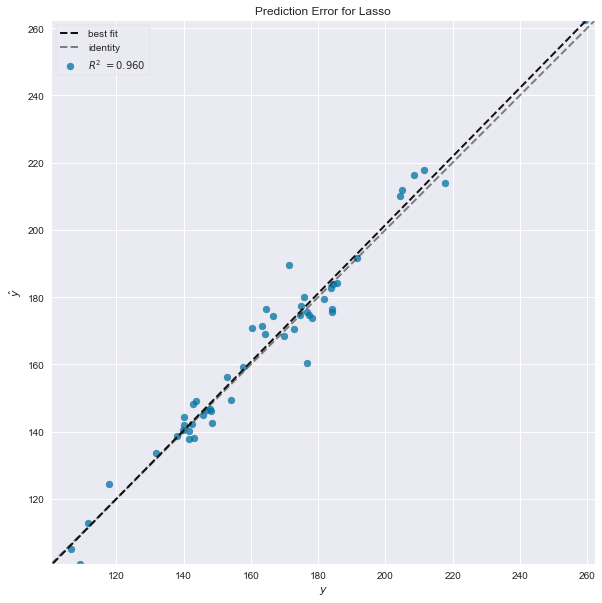

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
plt.figure(figsize=(10,10))
visualizer = PredictionError(lassoupd)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

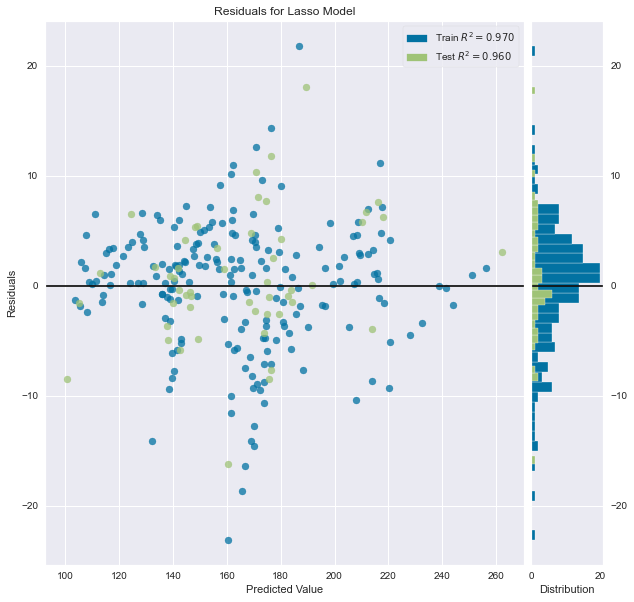

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
plt.figure(figsize=(10,10))
visualizer2 = ResidualsPlot(lassoupd)
visualizer2.fit(X_train, y_train)  
visualizer2.score(X_test, y_test)  
visualizer2.show()

In [51]:
lassoupd.fit(x, y).coef_

array([-1.26549517,  7.05204378,  0.01489393,  1.11558698,  0.06205057,
        0.23521553,  1.46652215,  0.05430696,  0.93535584])

In [52]:
coefficients['Lasso'] = lassoupd.fit(x, y).coef_

### Ridge Regression

In [53]:
from sklearn.linear_model import Ridge

In [54]:
ridge = Ridge(alpha=0.01)

In [55]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [56]:
y_pred3 = ridge.predict(X_test)

In [57]:
print(ridge.score(X_test,y_test))
print('MSE = {}'.format(MSE(y_test, y_pred3)))
print('RMSE = {} '.format(MSE(y_test, y_pred3)**(1/2)))
print('MAE = {}'.format(MAE(y_test, y_pred3)))
print('R Squared = {}'.format(r2_score(y_test, y_pred3)))

0.959163140701363
MSE = 34.42094630090575
RMSE = 5.866936705036602 
MAE = 4.220750711800588
R Squared = 0.959163140701363


In [58]:
ridge.coef_

array([-2.07133508, 13.76518007,  1.64931001,  3.03244337, -1.21851383,
        7.24748325,  3.14151396, 26.39543041, 32.4163536 ])

In [59]:
#Hyperparameter Tuning
gridr = GridSearchCV(estimator = ridge,param_grid = parameters,cv = 10,verbose = 10)
gridr.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV 1/10; 1/49] START alpha=0.1.................................................
[CV 1/10; 1/49] END ..................alpha=0.1;, score=0.983 total time=   0.0s
[CV 2/10; 1/49] START alpha=0.1.................................................
[CV 2/10; 1/49] END ..................alpha=0.1;, score=0.978 total time=   0.0s
[CV 3/10; 1/49] START alpha=0.1.................................................
[CV 3/10; 1/49] END ..................alpha=0.1;, score=0.956 total time=   0.0s
[CV 4/10; 1/49] START alpha=0.1.................................................
[CV 4/10; 1/49] END ..................alpha=0.1;, score=0.991 total time=   0.0s
[CV 5/10; 1/49] START alpha=0.1.................................................
[CV 5/10; 1/49] END ..................alpha=0.1;, score=0.932 total time=   0.0s
[CV 6/10; 1/49] START alpha=0.1.................................................
[CV 6/10; 1/49] END ..................alpha=0.

[CV 1/10; 6/49] END ..................alpha=0.6;, score=0.982 total time=   0.0s
[CV 2/10; 6/49] START alpha=0.6.................................................
[CV 2/10; 6/49] END ..................alpha=0.6;, score=0.974 total time=   0.0s
[CV 3/10; 6/49] START alpha=0.6.................................................
[CV 3/10; 6/49] END ..................alpha=0.6;, score=0.954 total time=   0.0s
[CV 4/10; 6/49] START alpha=0.6.................................................
[CV 4/10; 6/49] END ..................alpha=0.6;, score=0.992 total time=   0.0s
[CV 5/10; 6/49] START alpha=0.6.................................................
[CV 5/10; 6/49] END ..................alpha=0.6;, score=0.933 total time=   0.0s
[CV 6/10; 6/49] START alpha=0.6.................................................
[CV 6/10; 6/49] END ..................alpha=0.6;, score=0.953 total time=   0.0s
[CV 7/10; 6/49] START alpha=0.6.................................................
[CV 7/10; 6/49] END ........

[CV 6/10; 12/49] END ..alpha=1.2000000000000002;, score=0.952 total time=   0.0s
[CV 7/10; 12/49] START alpha=1.2000000000000002.................................
[CV 7/10; 12/49] END ..alpha=1.2000000000000002;, score=0.961 total time=   0.0s
[CV 8/10; 12/49] START alpha=1.2000000000000002.................................
[CV 8/10; 12/49] END ..alpha=1.2000000000000002;, score=0.980 total time=   0.0s
[CV 9/10; 12/49] START alpha=1.2000000000000002.................................
[CV 9/10; 12/49] END ..alpha=1.2000000000000002;, score=0.914 total time=   0.0s
[CV 10/10; 12/49] START alpha=1.2000000000000002................................
[CV 10/10; 12/49] END .alpha=1.2000000000000002;, score=0.969 total time=   0.0s
[CV 1/10; 13/49] START alpha=1.3000000000000003.................................
[CV 1/10; 13/49] END ..alpha=1.3000000000000003;, score=0.981 total time=   0.0s
[CV 2/10; 13/49] START alpha=1.3000000000000003.................................
[CV 2/10; 13/49] END ..alpha

[CV 6/10; 19/49] END ..alpha=1.9000000000000001;, score=0.951 total time=   0.0s
[CV 7/10; 19/49] START alpha=1.9000000000000001.................................
[CV 7/10; 19/49] END ..alpha=1.9000000000000001;, score=0.962 total time=   0.0s
[CV 8/10; 19/49] START alpha=1.9000000000000001.................................
[CV 8/10; 19/49] END ..alpha=1.9000000000000001;, score=0.980 total time=   0.0s
[CV 9/10; 19/49] START alpha=1.9000000000000001.................................
[CV 9/10; 19/49] END ..alpha=1.9000000000000001;, score=0.911 total time=   0.0s
[CV 10/10; 19/49] START alpha=1.9000000000000001................................
[CV 10/10; 19/49] END .alpha=1.9000000000000001;, score=0.969 total time=   0.0s
[CV 1/10; 20/49] START alpha=2.0................................................
[CV 1/10; 20/49] END .................alpha=2.0;, score=0.980 total time=   0.0s
[CV 2/10; 20/49] START alpha=2.0................................................
[CV 2/10; 20/49] END .......

[CV 1/10; 27/49] END .................alpha=2.7;, score=0.979 total time=   0.0s
[CV 2/10; 27/49] START alpha=2.7................................................
[CV 2/10; 27/49] END .................alpha=2.7;, score=0.968 total time=   0.0s
[CV 3/10; 27/49] START alpha=2.7................................................
[CV 3/10; 27/49] END .................alpha=2.7;, score=0.950 total time=   0.0s
[CV 4/10; 27/49] START alpha=2.7................................................
[CV 4/10; 27/49] END .................alpha=2.7;, score=0.991 total time=   0.0s
[CV 5/10; 27/49] START alpha=2.7................................................
[CV 5/10; 27/49] END .................alpha=2.7;, score=0.934 total time=   0.0s
[CV 6/10; 27/49] START alpha=2.7................................................
[CV 6/10; 27/49] END .................alpha=2.7;, score=0.950 total time=   0.0s
[CV 7/10; 27/49] START alpha=2.7................................................
[CV 7/10; 27/49] END .......

[CV 7/10; 33/49] END ..alpha=3.3000000000000003;, score=0.963 total time=   0.0s
[CV 8/10; 33/49] START alpha=3.3000000000000003.................................
[CV 8/10; 33/49] END ..alpha=3.3000000000000003;, score=0.980 total time=   0.0s
[CV 9/10; 33/49] START alpha=3.3000000000000003.................................
[CV 9/10; 33/49] END ..alpha=3.3000000000000003;, score=0.906 total time=   0.0s
[CV 10/10; 33/49] START alpha=3.3000000000000003................................
[CV 10/10; 33/49] END .alpha=3.3000000000000003;, score=0.968 total time=   0.0s
[CV 1/10; 34/49] START alpha=3.4000000000000004.................................
[CV 1/10; 34/49] END ..alpha=3.4000000000000004;, score=0.979 total time=   0.0s
[CV 2/10; 34/49] START alpha=3.4000000000000004.................................
[CV 2/10; 34/49] END ..alpha=3.4000000000000004;, score=0.966 total time=   0.0s
[CV 3/10; 34/49] START alpha=3.4000000000000004.................................
[CV 3/10; 34/49] END ..alpha

[CV 8/10; 39/49] END ..alpha=3.9000000000000004;, score=0.980 total time=   0.0s
[CV 9/10; 39/49] START alpha=3.9000000000000004.................................
[CV 9/10; 39/49] END ..alpha=3.9000000000000004;, score=0.904 total time=   0.0s
[CV 10/10; 39/49] START alpha=3.9000000000000004................................
[CV 10/10; 39/49] END .alpha=3.9000000000000004;, score=0.967 total time=   0.0s
[CV 1/10; 40/49] START alpha=4.0................................................
[CV 1/10; 40/49] END .................alpha=4.0;, score=0.978 total time=   0.0s
[CV 2/10; 40/49] START alpha=4.0................................................
[CV 2/10; 40/49] END .................alpha=4.0;, score=0.965 total time=   0.0s
[CV 3/10; 40/49] START alpha=4.0................................................
[CV 3/10; 40/49] END .................alpha=4.0;, score=0.947 total time=   0.0s
[CV 4/10; 40/49] START alpha=4.0................................................
[CV 4/10; 40/49] END .......

[CV 2/10; 45/49] END .................alpha=4.5;, score=0.964 total time=   0.0s
[CV 3/10; 45/49] START alpha=4.5................................................
[CV 3/10; 45/49] END .................alpha=4.5;, score=0.946 total time=   0.0s
[CV 4/10; 45/49] START alpha=4.5................................................
[CV 4/10; 45/49] END .................alpha=4.5;, score=0.991 total time=   0.0s
[CV 5/10; 45/49] START alpha=4.5................................................
[CV 5/10; 45/49] END .................alpha=4.5;, score=0.934 total time=   0.0s
[CV 6/10; 45/49] START alpha=4.5................................................
[CV 6/10; 45/49] END .................alpha=4.5;, score=0.949 total time=   0.0s
[CV 7/10; 45/49] START alpha=4.5................................................
[CV 7/10; 45/49] END .................alpha=4.5;, score=0.964 total time=   0.0s
[CV 8/10; 45/49] START alpha=4.5................................................
[CV 8/10; 45/49] END .......

GridSearchCV(cv=10, estimator=Ridge(alpha=0.01),
             param_grid=[{'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])}],
             verbose=10)

In [60]:
print("Best Accuracy: {:.2f} %".format(gridr.best_score_*100))
print("Best Parameters:", gridr.best_params_)

Best Accuracy: 96.23 %
Best Parameters: {'alpha': 0.1}


In [61]:
ridgeupd = Ridge(alpha=0.1)
ridgeupd.fit(X_train,y_train)

Ridge(alpha=0.1)

In [62]:
y_pred3upd = ridgeupd.predict(X_test)

In [63]:
print(ridgeupd.score(X_test,y_test))
print('MSE = {}'.format(MSE(y_test, y_pred3upd)))
print('RMSE = {} '.format(MSE(y_test, y_pred3upd)**(1/2)))
print('MAE = {}'.format(MAE(y_test, y_pred3upd)))
print('R Squared = {}'.format(r2_score(y_test, y_pred3upd)))

0.9598745031755028
MSE = 33.82134657792549
RMSE = 5.815612313241443 
MAE = 4.190320001802779
R Squared = 0.9598745031755028


In [64]:
ridgeupd.coef_

array([-1.97526664e+00,  1.37305754e+01,  1.64444516e+00,  2.70626409e+00,
       -2.87356256e-02,  7.78612801e+00,  3.03833451e+00,  2.61030188e+01,
        3.03326340e+01])

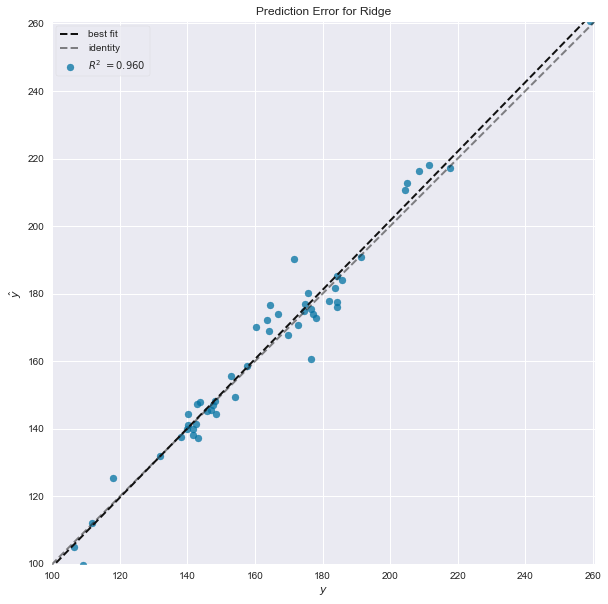

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [65]:
plt.figure(figsize=(10,10))
visualizer = PredictionError(ridgeupd)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

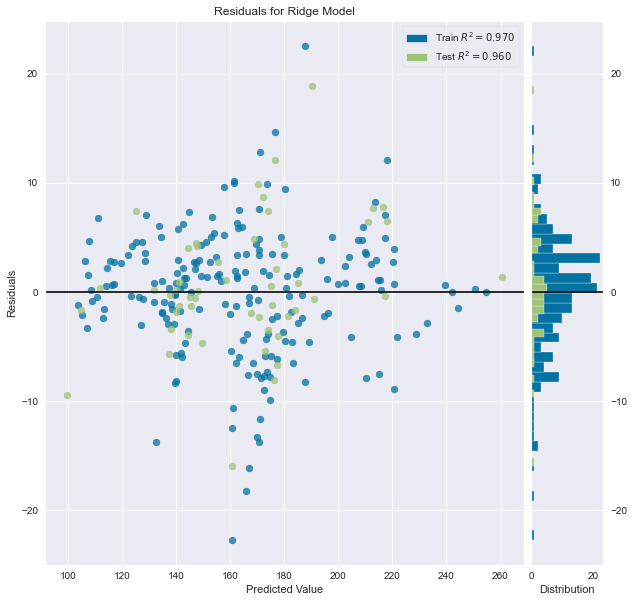

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
plt.figure(figsize=(10,10))
visualizer2 = ResidualsPlot(ridgeupd)
visualizer2.fit(X_train, y_train)  
visualizer2.score(X_test, y_test)  
visualizer2.show()

In [67]:
ridgeupd.fit(x,y).coef_

array([-1.51159581,  7.00548367,  0.01391456,  2.02171597,  0.03415474,
        0.22739762,  1.64539382,  0.05531254,  1.03353238])

In [68]:
coefficients['Ridge'] = ridgeupd.fit(x,y).coef_

### Neural Network model Keras

In [69]:
msle = MeanSquaredLogarithmicError()

In [70]:
def build_model_using_sequential():
    model = Sequential([
    Dense(18, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(9, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
    return model

model = build_model_using_sequential()

In [71]:
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.1), 
    metrics=[msle]
)

In [72]:
batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

In [73]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init)

In [74]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=10,
    validation_split=0.2
)

Epoch 1/50
17/17 [==============================] - 1s 40ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.7737 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 2/50
17/17 [==============================] - 0s 25ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.8110 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.8263 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.8140 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.7763 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 6/50
17/17 [==============================] - 0s 4ms

17/17 [==============================] - 0s 4ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.8617 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 45/50
17/17 [==============================] - 0s 4ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.8862 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 46/50
17/17 [==============================] - 0s 4ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.7867 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 47/50
17/17 [==============================] - 0s 4ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.8190 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 48/50
17/17 [==============================] - 0s 4ms/step - loss: 25.8112 - mean_squared_logarithmic_error: 25.8197 - val_loss: 26.4387 - val_mean_squared_logarithmic_error: 26.3860
Epoch 49/50
17/17 [==============================] - 0s 4ms/step - 

In [75]:
y_pred4 = model.predict(X_test)

In [76]:
print('MSE = {}'.format(MSE(y_test, y_pred4)))
print('RMSE = {} '.format(MSE(y_test, y_pred4)**(1/2)))
print('MAE = {}'.format(MAE(y_test, y_pred4)))
print('R Squared = {}'.format(r2_score(y_test, y_pred4)))

MSE = 27714.83393088709
RMSE = 166.47772803257223 
MAE = 163.92665375125057
R Squared = -31.88075707816745


In [77]:
coefficients.rename(columns={0:'Fields'},inplace=True)

In [78]:
coefficients

,Fields,Linear,Lasso,Ridge
0,IR,-1.513234,-1.265495,-1.511596
1,MSNH,7.006520,7.052044,7.005484
2,MOHP,0.013909,0.014894,0.013915
3,MR30,2.026391,1.115587,2.021716
4,RI,0.033950,0.062051,0.034155
5,PPICM,0.227263,0.235216,0.227398
6,UNER,1.646623,1.466522,1.645394
7,BP,0.055323,0.054307,0.055313
8,CPI,1.034277,0.935356,1.033532


In [79]:
coefm = coefficients.melt('Fields', var_name='cols', value_name='vals')

<AxesSubplot:xlabel='Fields', ylabel='vals'>

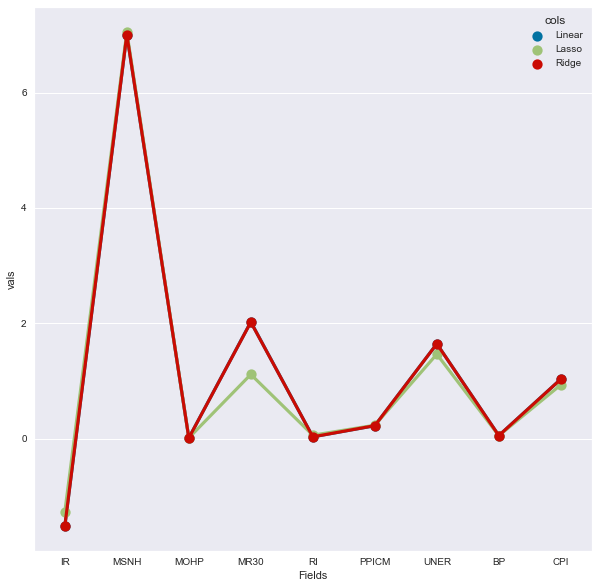

In [80]:
plt.figure(figsize=(10,10))
sns.pointplot(x="Fields", y="vals", hue='cols', data=coefm)

In [81]:
print('Linear = {}'.format(r2_score(y_test, y_pred)))
print('Lasso = {}'.format(r2_score(y_test, y_pred2upd)))
print('Ridge = {}'.format(r2_score(y_test, y_pred3upd)))
print('Neural Network Keras = {}'.format(r2_score(y_test, y_pred4)))

Linear = 0.9590700873937907
Lasso = 0.9603884656369689
Ridge = 0.9598745031755028
Neural Network Keras = -31.88075707816745


##### We can see high coefficient values for the fields IR, MSNH, MR30, UNER, CPI
##### The highest coefficient value is MSNH. This means Ratio of new houses for sale to new houses sold impacts the most among all the variables. Positive coefficients indicate rise in that particular variable will lead to rise in the dependent variable i.e. in this case the Home Price Index
##### Inflation rate has a negative coefficient. This indicates that rise in Inflation rate will lead to decrease in Home Price Index.
##### Number of Mortage Originations, Rent Index, Number of Building Permits have coefficient value as almost 0. This indicated that they are not important for determining the Home Price Index
### Lasso regression had the best R squared value among all models

#### Dimension Reduction

In [82]:
pca = PCA(n_components = 2)
pca_values = pca.fit_transform(X_train)
pca_valuest = pca.transform(X_test)

In [83]:
pclas = Lasso(alpha=0.1)

In [84]:
pclas.fit(X_train,y_train)

Lasso(alpha=0.1)

In [85]:
predpc = pclas.predict(X_test)

In [86]:
print('MSE = {}'.format(MSE(y_test, predpc)))
print('RMSE = {} '.format(MSE(y_test, predpc)**(1/2)))
print('MAE = {}'.format(MAE(y_test, predpc)))
print('R Squared = {}'.format(r2_score(y_test, predpc)))

MSE = 33.388133187115145
RMSE = 5.7782465495265205 
MAE = 4.292919523138025
R Squared = 0.9603884656369689
